In [81]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
import numpy as np
import matplotlib.pyplot as plt

In [82]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [83]:
X_train.shape

(60000, 28, 28)

In [84]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [86]:
indices = [i for i in range(len(X_train))]
random = np.random.choice(indices, size=9)
random

array([38660, 16315, 25726,  9413, 16246, 23939, 16105,  6952, 15079])

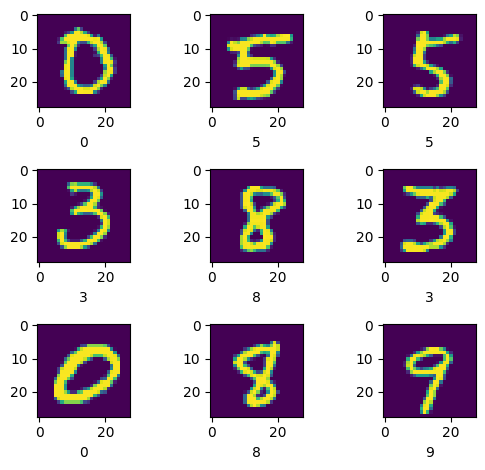

In [87]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[random[i]])
    plt.xlabel(y_train[random[i]])
    plt.tight_layout()


In [88]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [89]:
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [90]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [91]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3, 3), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


c:\python 3.9\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9087 - loss: 0.3033
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9823 - loss: 0.0577
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9894 - loss: 0.0339
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9934 - loss: 0.0214
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9951 - loss: 0.0152
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9964 - loss: 0.0109
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9982 - loss: 0.0056
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9980 - loss: 0.0055
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9986 - loss: 0.0045


In [92]:
cnn.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9805 - loss: 0.0763


[0.055615924298763275, 0.9854999780654907]

In [93]:
y_preds = cnn.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [94]:
y_pred = [np.argmax(i) for i in y_preds]

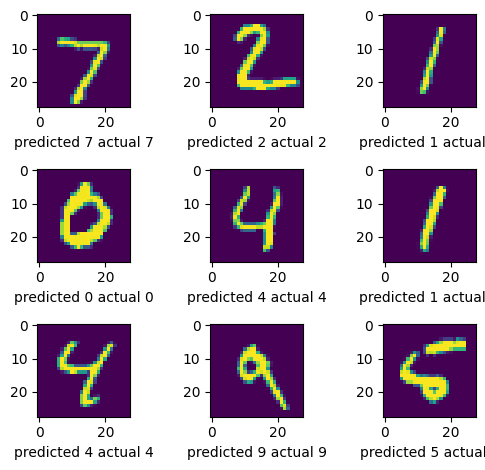

In [95]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    plt.xlabel(f"predicted {y_pred[i]} actual {y_test[i]}")
    plt.tight_layout()

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

